<a href="https://colab.research.google.com/github/TetianaMar-888/Python_for_ds_tasks/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22HW_2_1_%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B8_%D0%BB%D1%96%D0%BD%D1%96%D0%B8%CC%86%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('drive/MyDrive/Machine_Learning/medical-charges.csv')

In [7]:
medical_df = pd.read_csv('drive/MyDrive/Machine_Learning/medical-charges.csv')

In [8]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


1. Можна розділити дані по категоріям та вивести середню слату. Наприклад, в категорії курців між чоловіками та жінками. Та в категорії регіонів.
2. Кореляція. На основі числових змінних (вік, ІМТ, кількість дітей).
3. Зробити категоризацію змінних

In [9]:
df.groupby('smoker')['charges'].mean()
df.groupby('region')['charges'].mean()
df.groupby(['smoker', 'sex'])['charges'].mean()

smoker  sex   
no      female     8762.297300
        male       8087.204731
yes     female    30678.996276
        male      33042.005975
Name: charges, dtype: float64

In [10]:
df.groupby('smoker')['charges'].mean()
df.groupby(pd.cut(df['age'], bins=[17,30,45,60,100]))['charges'].mean()
df.groupby(pd.cut(df['bmi'], bins=[0,18.5,25,30,100]))['charges'].mean()

<ipython-input-10-9600e0f4b26e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['age'], bins=[17,30,45,60,100]))['charges'].mean()
<ipython-input-10-9600e0f4b26e>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['bmi'], bins=[0,18.5,25,30,100]))['charges'].mean()


,charges
bmi,
"(0.0, 18.5]",8657.620652
"(18.5, 25.0]",10435.440719
"(25.0, 30.0]",10997.803881
"(30.0, 100.0]",15560.926321


**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [11]:
!pip install plotly matplotlib seaborn --quiet

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [17]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [15]:
fig = px.histogram(medical_df,
                   x='sex',
                   marginal='box',
                   color_discrete_sequence=['green'],
                   title='Distribution of sex')
fig.update_layout(bargap=0.1)
fig.show()

In [25]:
fig_region = px.histogram(df,
                          x='charges',
                          marginal='box',
                          color='region',
                          nbins=75,
                          title='Розподіл страхових зборів за регіоном',
                          labels={'charges': 'Медичні збори (charges)', 'region': 'Регіон'})
fig_region.update_layout(bargap=0.1)
fig_region.show()

In [22]:
fig = px.histogram(medical_df,
                   x='region',
                   marginal='box',
                   color_discrete_sequence=['orange'],
                   title='Distribution of region')
fig.update_layout(bargap=0.1)
fig.show()

Майже однакова кількість застрахованих осіб в розрізі статі. Чоловіків на 14 осіб більше. Найменші страхові внески сплачують: як чоловіки, так і жінки. Потім, від 2000 найбільша кількість жінок, як ми бачимо з гістограми. І в загальному найбільша кількість осіб сплачують страхові внески до 14 тисяч. Далі, кількість осіб суттєво зменшується, які платять більше цієї суми. Але чоловіків застрахованих зі сплатою високих внесків більше за жінок. Щодо розподілу по регіональній ознакі, то на гістограмі видно, що з southwest та northwest однакова кількість людей по 325 платників. З northeast на одну особу менше, тобто 324 платники. І з southeast 364 особи. Тобто розподіл майже рівномірний.
Змінна sex, на мою думку, є важливою для встановлення суми внеску, але в поєднанні з іншими змінними, такими як наявність дітей, шкідливих звичок та доходу. Змінна region з цього розподілу та за інформацією, яка нам відома, не має впливу на визначення страхового внеску, на мою думку.   

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [26]:
medical_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [27]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

In [24]:
fig_region = px.histogram(df,
                          x='smoker',
                          marginal='box',
                          color='region',
                          title='Розподіл курців за регіоном',
                          labels={'smoker': 'Курці (smoker)', 'region': 'Регіон'})
fig_region.update_layout(bargap=0.1)
fig_region.show()

З розподілу курців ми бачимо, що кількість не курців набагато більша за кількість людей, які палять. Найбільша кількість, які не палять, з southeast. Хоча розподіл майже рівний по регіонам. Hайбільше курців теж з southeast в порівнянні з іншими регіонами.

In [28]:
fig_children = px.histogram(df,
                          x='smoker',
                          color='children',
                          title='Розподіл курців за наявністю дітей',
                          labels={'smoker': 'Курці (smoker)', 'children': 'Кількість дітей'})
fig_children.update_layout(bargap=0.1)
fig_children.show()

Найбільша кількість застрахованих, що не палять - не мають дітей. Далі серед некурців 1 дитина в сімї. Таких людей 263, майже вдвічі менше за некурців без дітей. Далі особи з двома дітьми, трьома. І найменша кількість застрахованих, які мають чотирьох та п'ять дітей.
Серед курців домінуючу позицію займають особи без дітей. Потім ті, хто мають одну, дві, три і чотири дитини. Серез курців немає сімей з п'ятьма дітьми. Але в порівнянні з курцями, найбільша кількість осіб-застрахованих відносяться до не курців.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [36]:
df[['children', 'charges']].isnull().sum()

,0
children,0
charges,0


In [42]:
(medical_df['charges'] < 0).any()

np.False_

In [45]:
fig = px.scatter(medical_df,
                 x='charges',
                 y='children',
                 color='sex',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Charges vs. Children')
fig.update_traces(marker_size=5)
fig.show()

In [43]:
? px.violin

In [46]:
fig = px.violin(df,
                x="children",
                y="charges",
                color='sex',
                box=True,  # Додати boxplot всередину
                points="all",  # Показати всі точки
                title="Charges vs. Children")

fig.show()

In [47]:
fig = px.violin(df,
                x="children",
                y="charges",
                color='smoker',
                box=True,  # Додати boxplot всередину
                points="all",  # Показати всі точки
                title="Charges vs. Children")

fig.show()

Проаналізувавши графіки стовпців charges та children можна зробити наступні висновки.
#З першого та другого графіку видно, що найбільше платників - це чоловіки, які не мають дітей. Але, різниця від жінок без дітей не велика. І також ці особи платять найменші внески. Також з першого графіку видно, що чим більша кількість дітей, тим оплати стартують з більшої суми.
#З третього графіку ми бачимо, що курці платять більші суми в незалежності від наявності дітей. В той же час, ми спостерігаємо тенденцію, що невелика кількість застрахованих осіб мають 4 та 5 дітей. Їх дуже мала кількість. При цьому ми бачимо, що некурців, у яких є діти - більше і вони сплачують менші внески.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [54]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

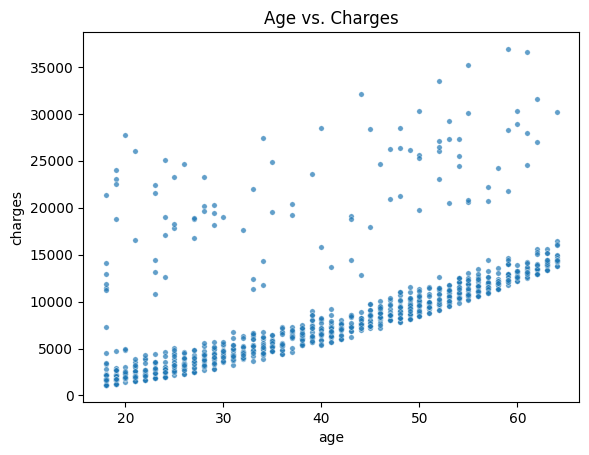

In [55]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

In [62]:
def estimate_charges(age, w, b):
    return w * age + b

In [63]:
w = 50
b = 100

In [77]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

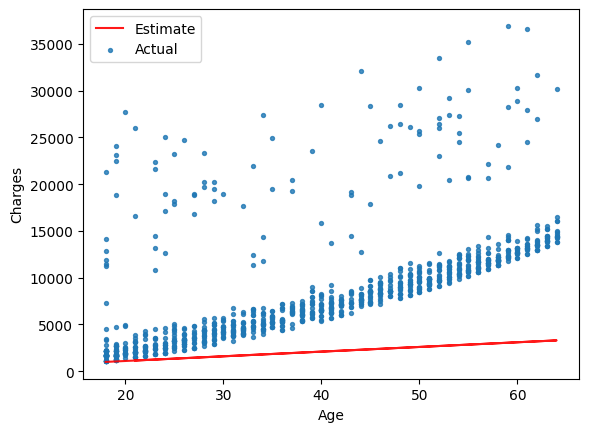

In [78]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [110]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

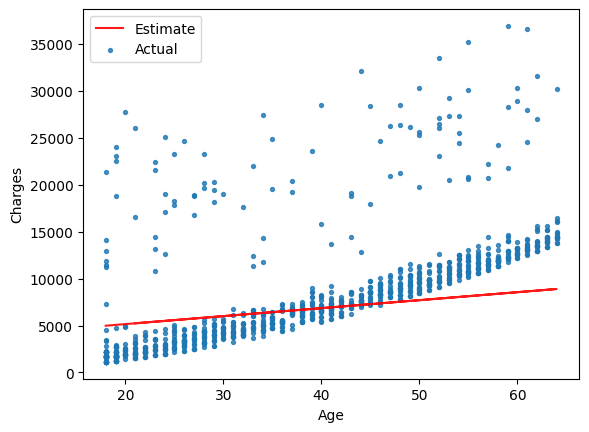

In [114]:
try_parameters(85, 3450)

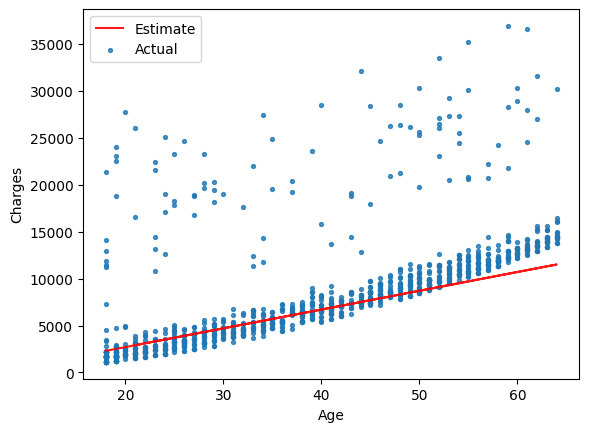

In [160]:
try_parameters(200, -1300)

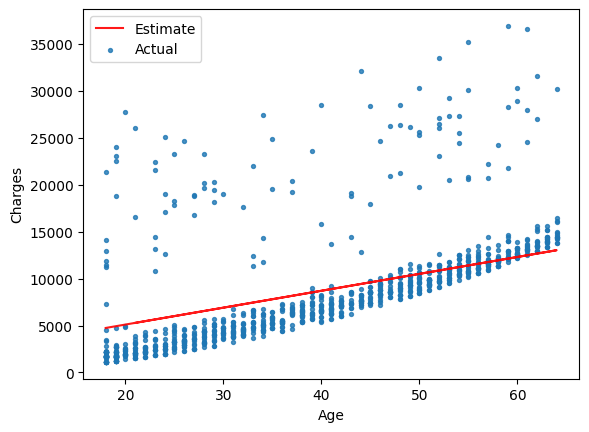

In [139]:
try_parameters(180, 1500)

RMSE Loss:  4734.844868395719


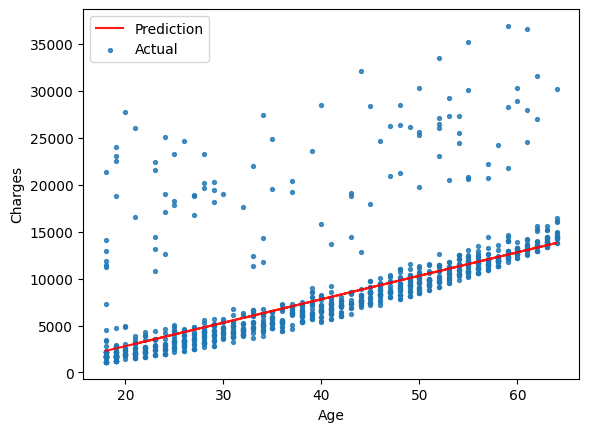

In [199]:
try_parameters(250, -2200)

RMSE Loss:  4706.910198203719


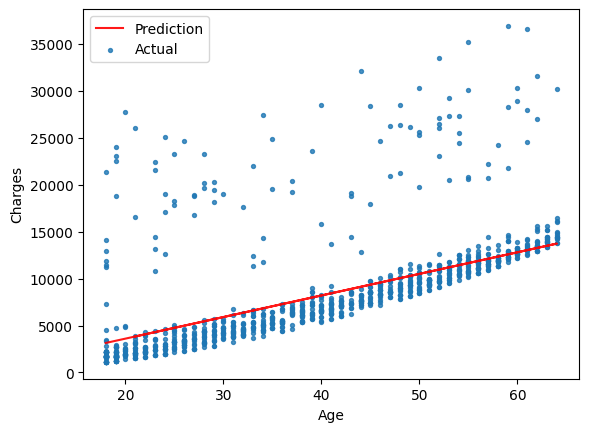

In [198]:
try_parameters(230, -1000)

RMSE Loss:  4695.183428006965


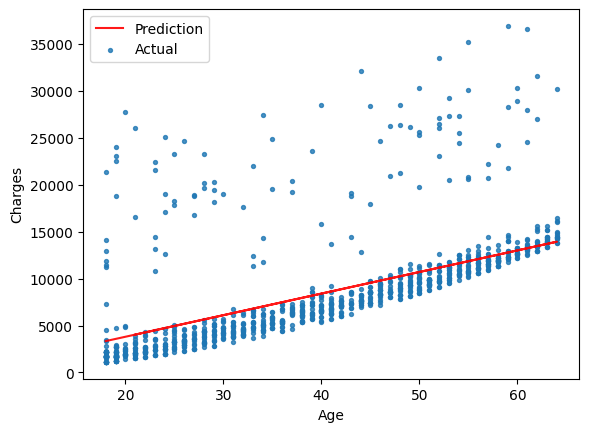

In [222]:
try_parameters(230, -800)

#Висновки
 Намагаючись "підібрати" лінію, використовуючи точки 𝑤 та 𝑏, щоб використовувати її для прогнозування вартості страхування за віком, я дійшла висновку, що 𝑤 відповідає за кут нахилу. Пропорційно показники нахилу та зміщення не змінюються. Найоптимальніші значення ( на стільки вистачило мого терпіння) я знайшла 𝑤=230 та 𝑏= (-800). За цими параметрами наша  "підгонка моделі" найбільше наближена до реальних даних і "лежить на точках". З правим зкосом.



**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [200]:
def rmse(target, predictions):
    return np.sqrt(np.mean(np.square(target - predictions)))

In [214]:
w = 230
b = -800

RMSE Loss:  4695.183428006965


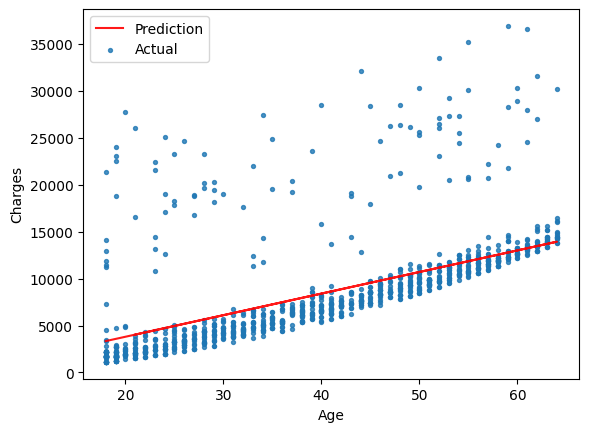

In [215]:
try_parameters(w, b)

In [216]:
target = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [217]:
rmse(target, predicted)

np.float64(4695.183428006965)

In [218]:
medical_df.charges.describe()

,charges
count,1338.000000
mean,13270.422265
std,12110.011237
min,1121.873900
25%,4740.287150
50%,9382.033000
75%,16639.912515
max,63770.428010


In [219]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  4706.910198203719


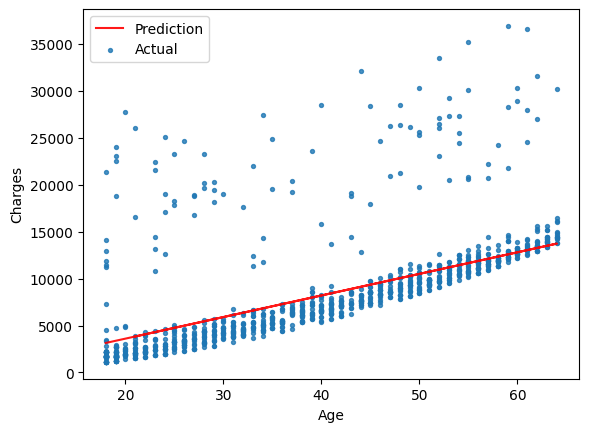

In [221]:
try_parameters(230, -1000)

RMSE Loss:  5107.2789462514265


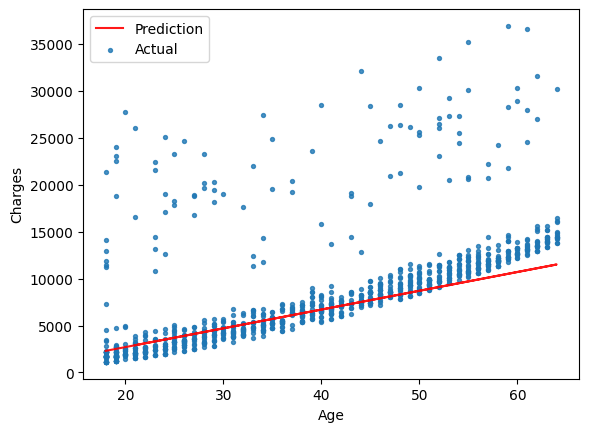

In [235]:
try_parameters(200, -1300)

RMSE Loss:  4734.844868395719


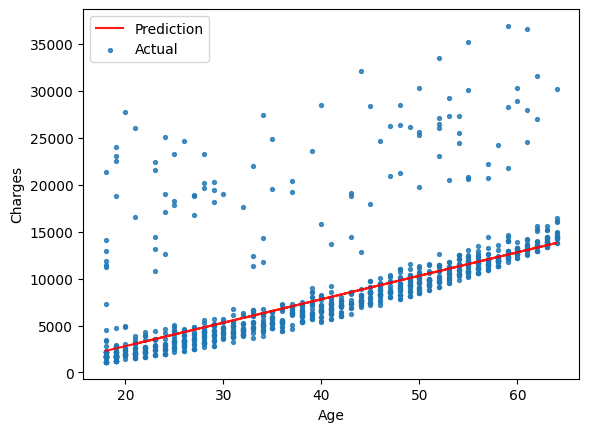

In [223]:
try_parameters(250, -2200)

RMSE Loss:  4824.049261526936


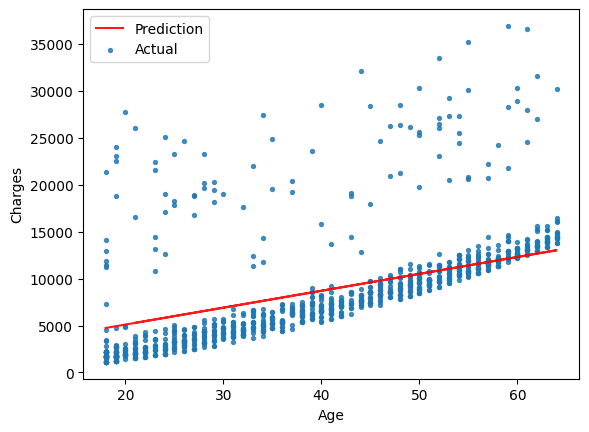

In [224]:
try_parameters(180, 1500)

RMSE Loss:  5567.6589435008445


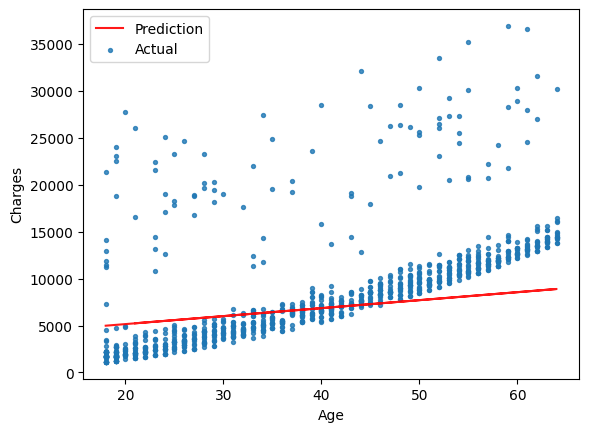

In [225]:
try_parameters(85, 3450)

#Яке найнижче значення втрат ви зможете досягти?
Найнижче значення втрат, що мені вдалося досягти відповідає 4695.18 дол., що є меншим за стандартне відхилення в 2,5 рази. (mean	13270.42 та std	12110.01

#Чи можете ви придумати загальну стратегію для знаходження кращих значень  𝑤  та  𝑏  методом проб та помилок?
За моїми пробами та помилками, я можу зробити висновок, що для більш точнішої побудови моделі, зміщення має бути від'ємним показником.